<h2>Problem Statements</h2>
<ol>
<li><b>Can we predict if an applicant is approved for a loan?</b></li><br>
<li><b>What factors influence the likelihood of a high-grade loan?</b></li><br>
<li><b>What are the different customer segments based on income, employment length, and loan intent?</b></li>


<h3>DataSet</h3>
<a href="https://www.kaggle.com/competitions/playground-series-s4e10/data">Loan Approval Prediction</a> - Offers us the ability to do a lot of EDA!

<h3>EDA Study</h3>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
# from ucimlrepo import fetch_ucirepo

sns.set(style="whitegrid")

<h3>Data Loading & Quick Overview</h3>

In [19]:
test_df = pd.read_csv('playground-series-s4e10/test.csv')
test_df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [20]:
train_df = pd.read_csv('playground-series-s4e10/train.csv')
train_df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


<ol>
<li>The data does match my expectations. However, I think it's best to use 'train.csv' for our problem statements as it has "loan_status" as a column and we can use this to figure out factors for loan approval.<br>
<i>These datasets were part of a Kaggle competition to find a model from the 'test.csv', hence why there's a missing column.</i></li><br>
<li>Yes! I think I need to figure out the meaning of "cb_person_default_on_file" and "cb_person_cred_hist_length".</li><br>
<li>There does not seem to be any missing data.</li>
</ol>

<h3>Shape & Features</h3>

In [21]:
# Shape: (rows, columns)
print(f"Dataset shape: {train_df.shape}")

# Display all column names
print("\nFeature Names:")
print(train_df.columns.tolist())

Dataset shape: (58645, 13)

Feature Names:
['id', 'person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length', 'loan_status']


<ol>
<li>The data is large enough for analysis, as we have many variables and over 50,000 rows of data.</li><br>
<li>No, there are no duplicate columns or columns with similar information.</li>
</ol>

In [26]:
print(f"Unique loan grade values: {train_df['loan_grade'].unique()}")

Unique loan grade values: ['B' 'C' 'A' 'D' 'E' 'F' 'G']


<h3>Data Types & Missing Values</h3>

In [28]:
# Understanding datatypes
print(train_df.dtypes)

# Check missing values
print("\nMissing Values Count:")
print(df.isnull().sum())

id                              int64
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object

Missing Values Count:
id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


<ol>
<li>Since there are no missing data or values, we cannot gather any insights.</li>
</ol>

<h3>Summary Statistics & Outlier Detection</h3>

In [29]:
# Summary statistics
train_df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [36]:
df['person_income'] = df['person_income'].astype(int)

<ol>
<li>I didn't expect an outlier for "person_age" and "person_emp_length" to have a maximum number of 123,  so it might be worth looking into that specific data point.</li><br>
<li>I think age has relatively lower numbers in each quartile, so it brings me an idea that there are young adults getting loans for college, cars, houses, etc. as they start adulthood. I also think employment length is also relatively low, so it brings me to another idea that individuals are getting loans because their current jobs do not pay them well enough to support their living needs.</li><br>
<li>I think the only extreme outlier is the maximum for age and employment length.</li><br>
<li>I think we should only drop outliers that are impossible or unreasonable (ie., age).</li>
</ol>

<h3>Univariate Analysis</h3>

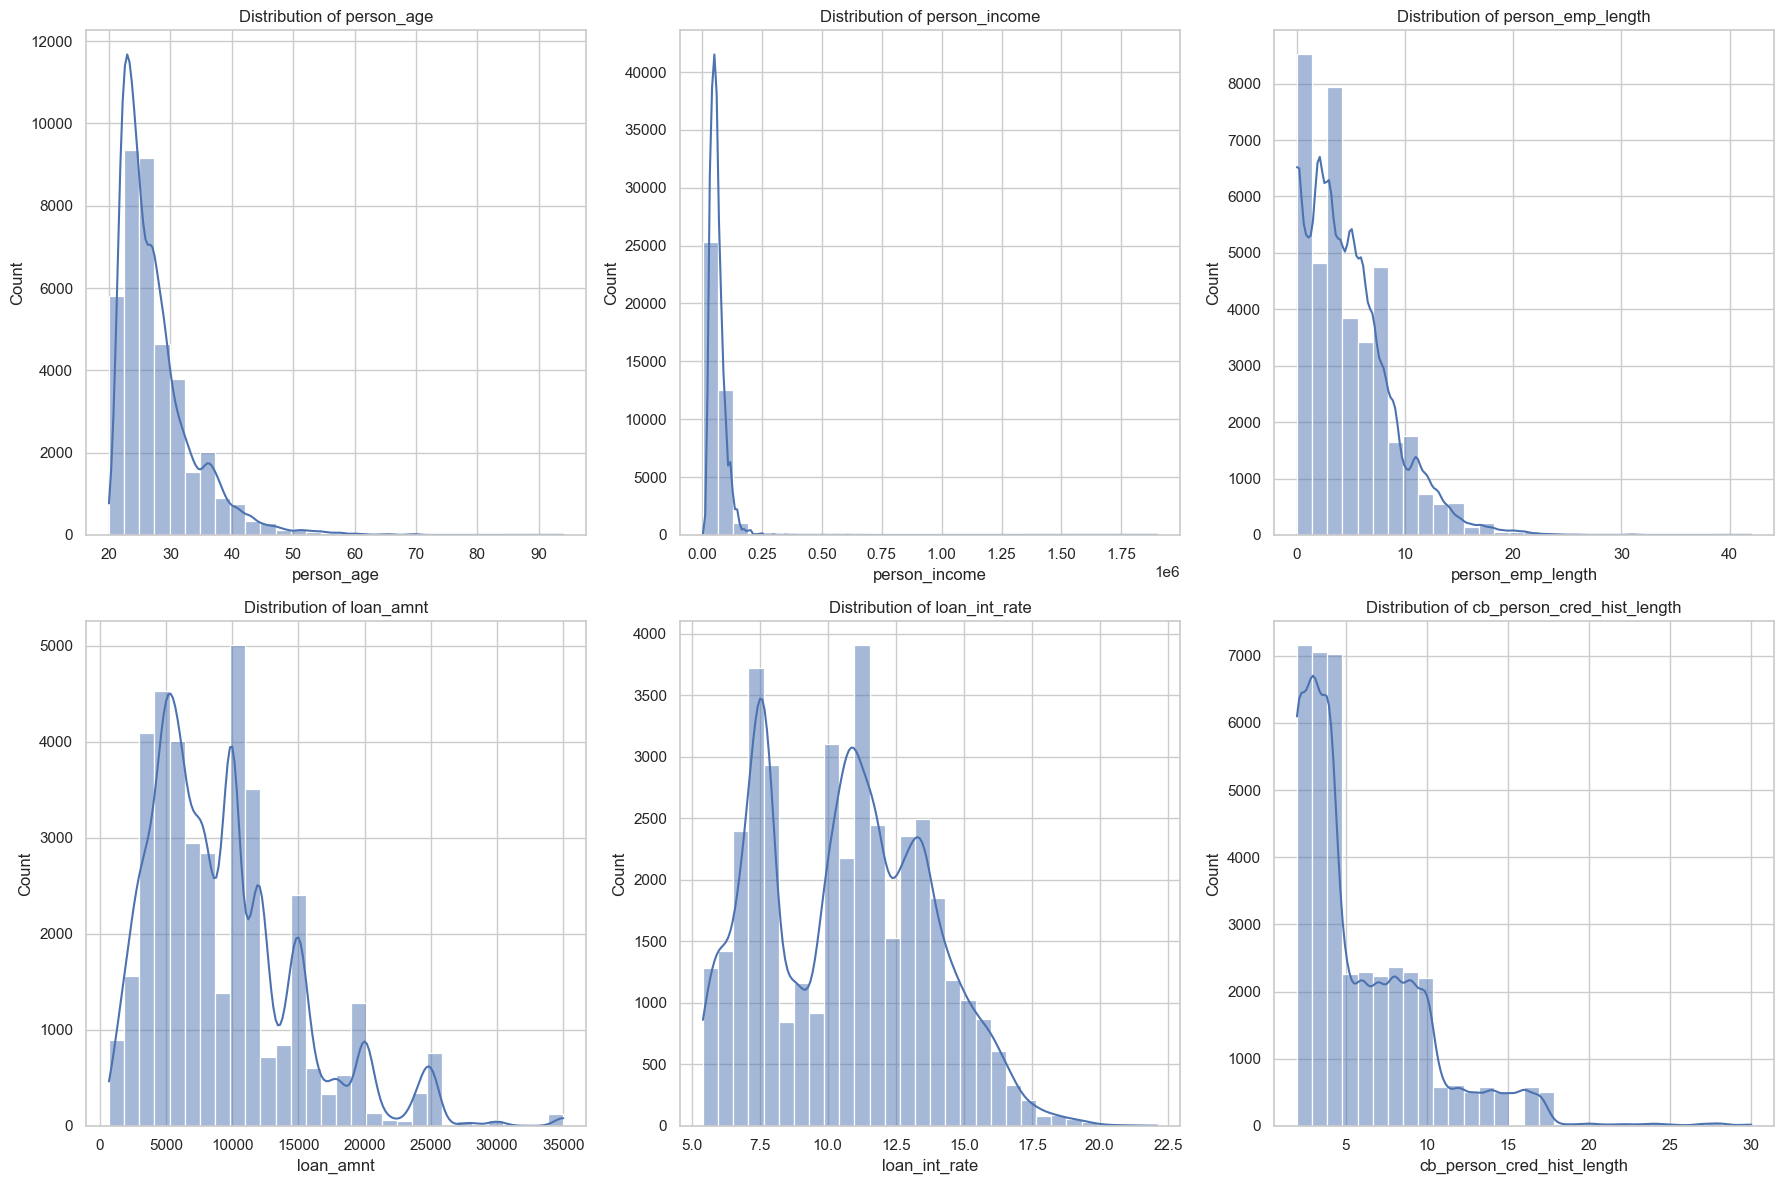

In [41]:
# Define features for visualization (Choosing numerical features)
num_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length']

# Create a 2x3 grid for visualization
fig, ax = plt.subplots(2, 3, figsize=(18,12))

# Iterate over features and plot
for i, feature in enumerate(num_features):
    row, col = divmod(i, 3)
    sns.histplot(df[feature], kde=True, bins=30, ax=ax[row, col])
    ax[row, col].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

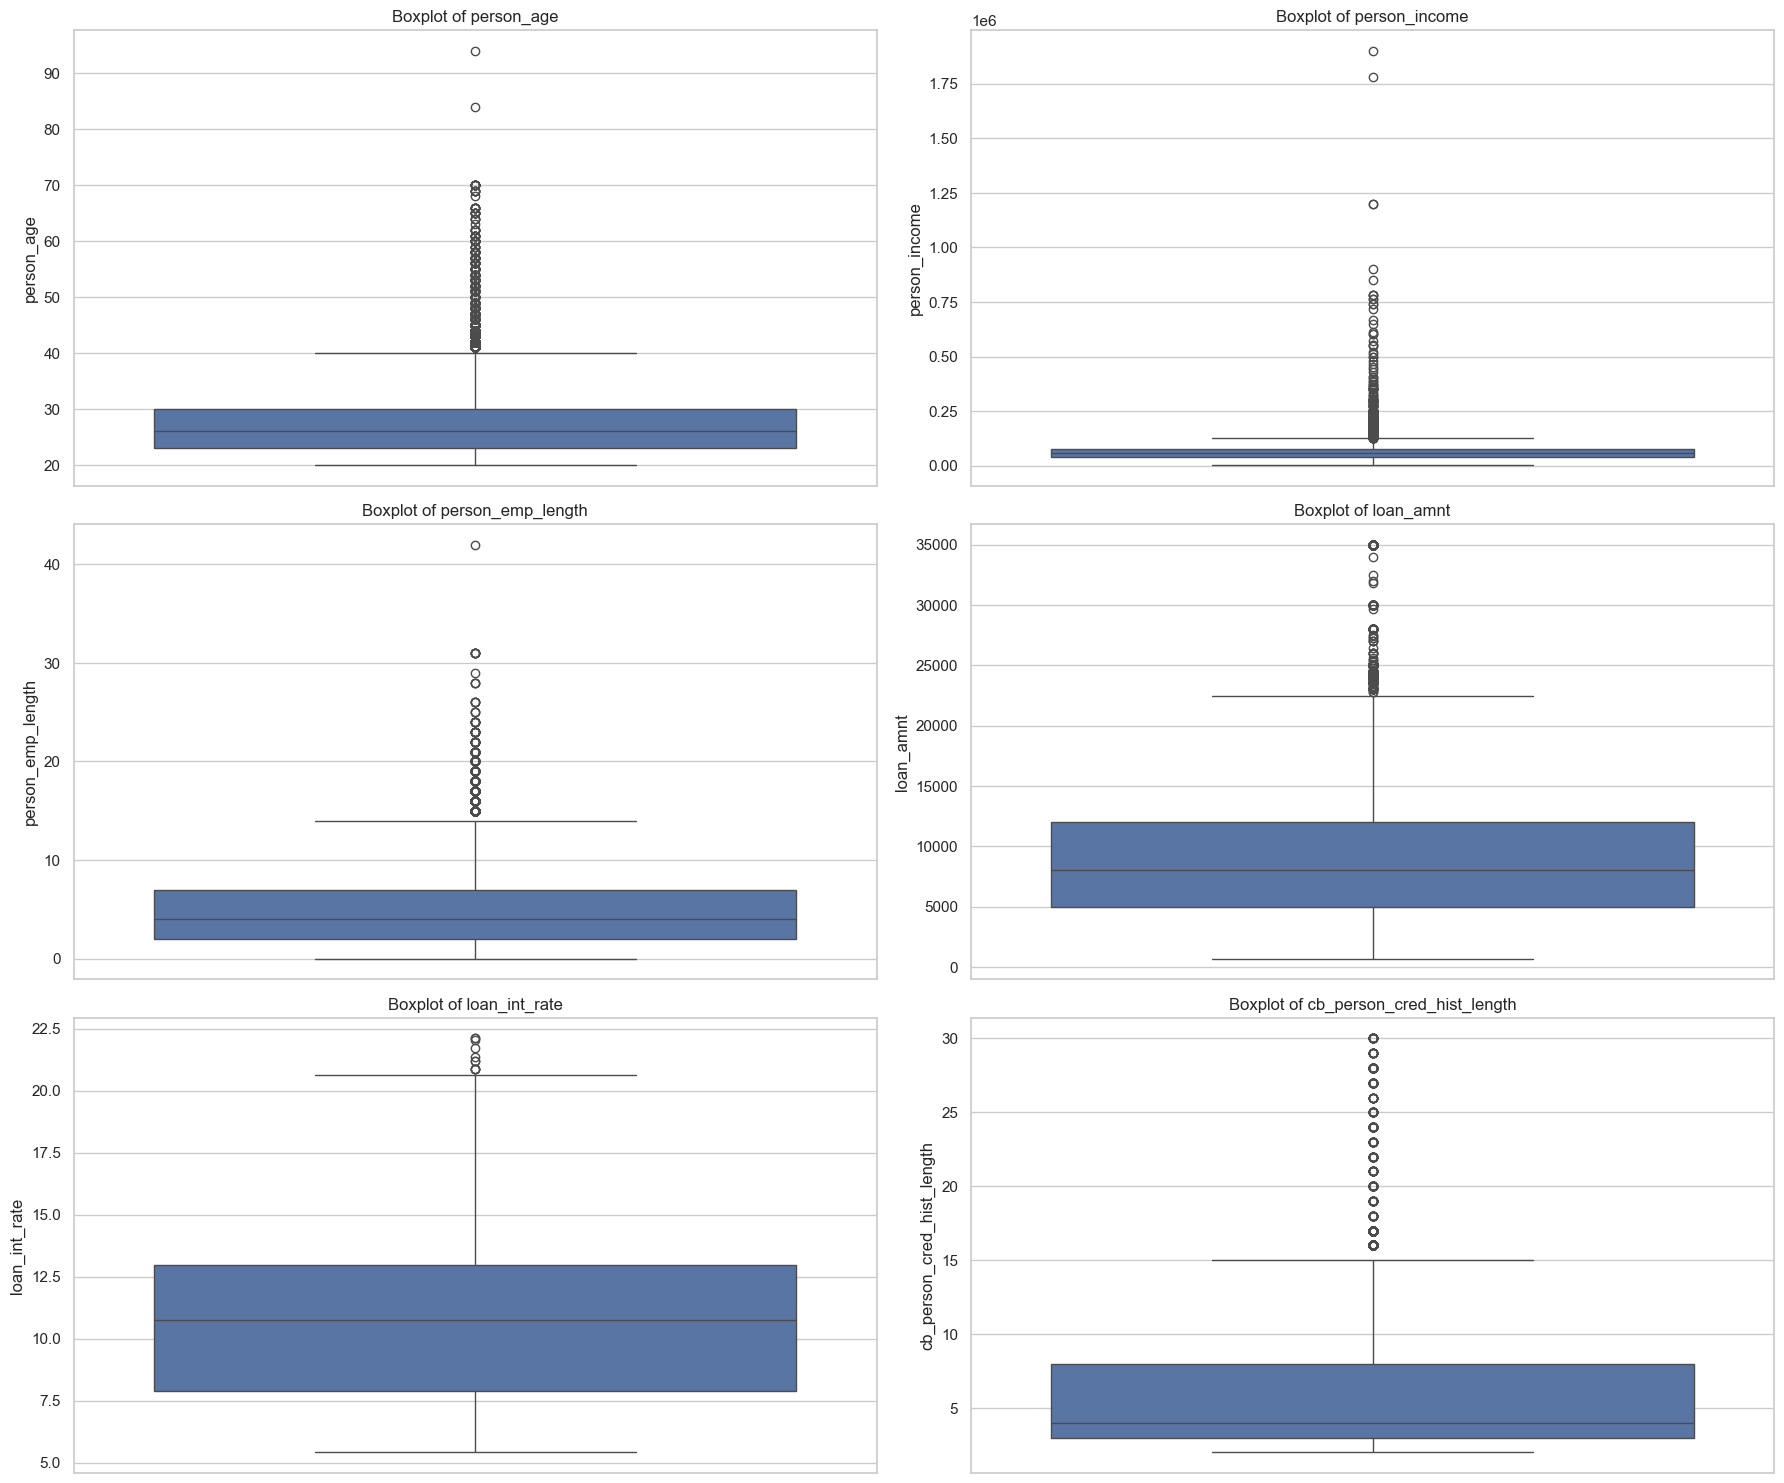

In [42]:
# Create boxplots for numerical variables
fig, ax = plt.subplots(3, 2, figsize=(18, 15))

for i, feature in enumerate(num_features):
    row, col = divmod(i, 2)
    sns.boxplot(y=df[feature], ax=ax[row, col])
    ax[row, col].set_title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

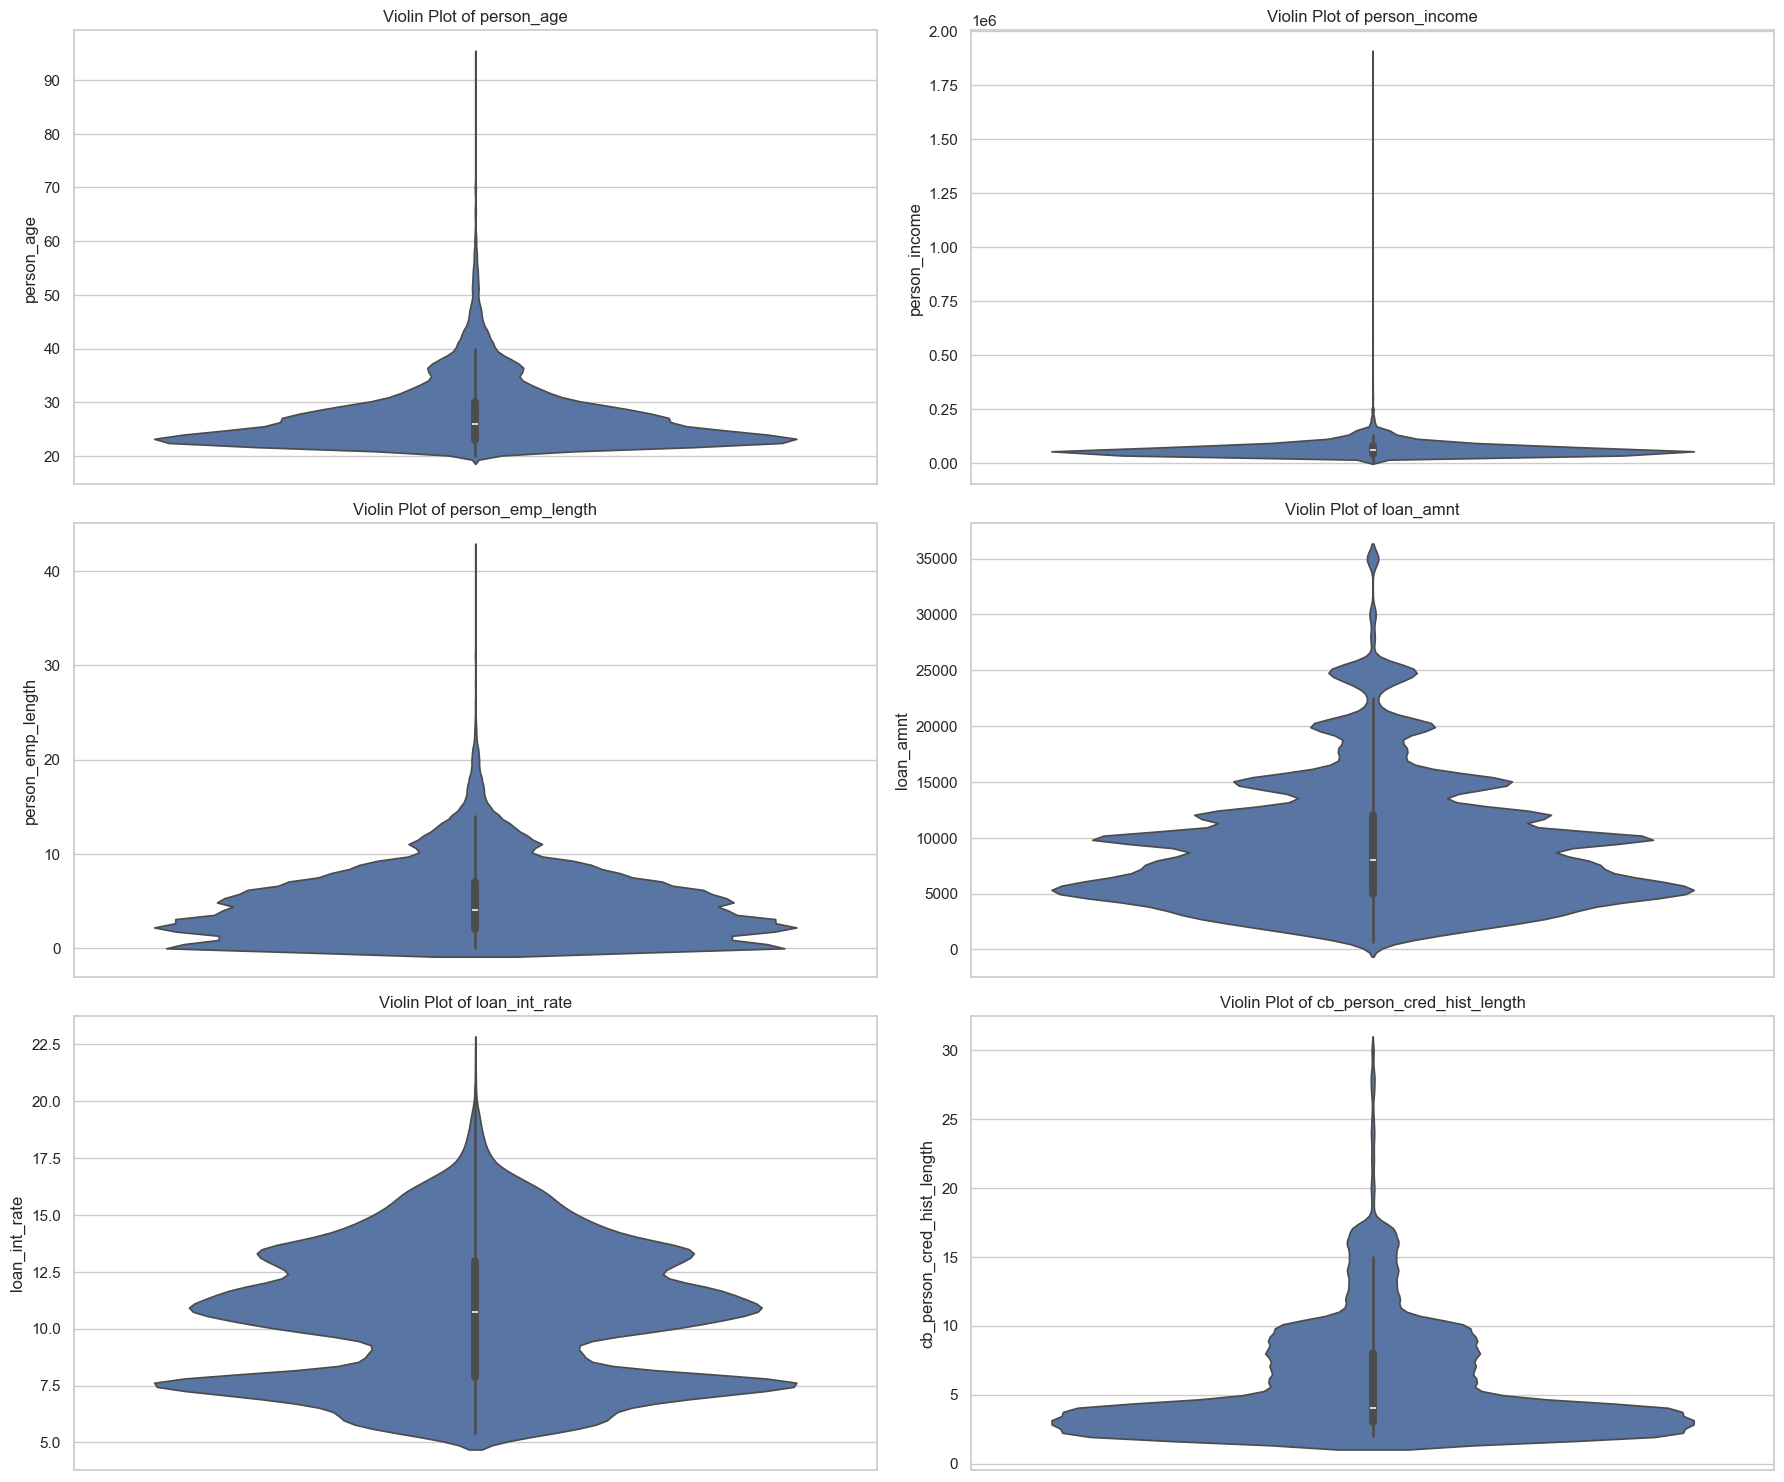

In [43]:
# Create violin plots for numerical variables
fig, ax = plt.subplots(3, 2, figsize=(18, 15))

for i, feature in enumerate(num_features):
    row, col = divmod(i, 2)
    sns.violinplot(y=df[feature], ax=ax[row, col])
    ax[row, col].set_title(f'Violin Plot of {feature}')

plt.tight_layout()
plt.show()

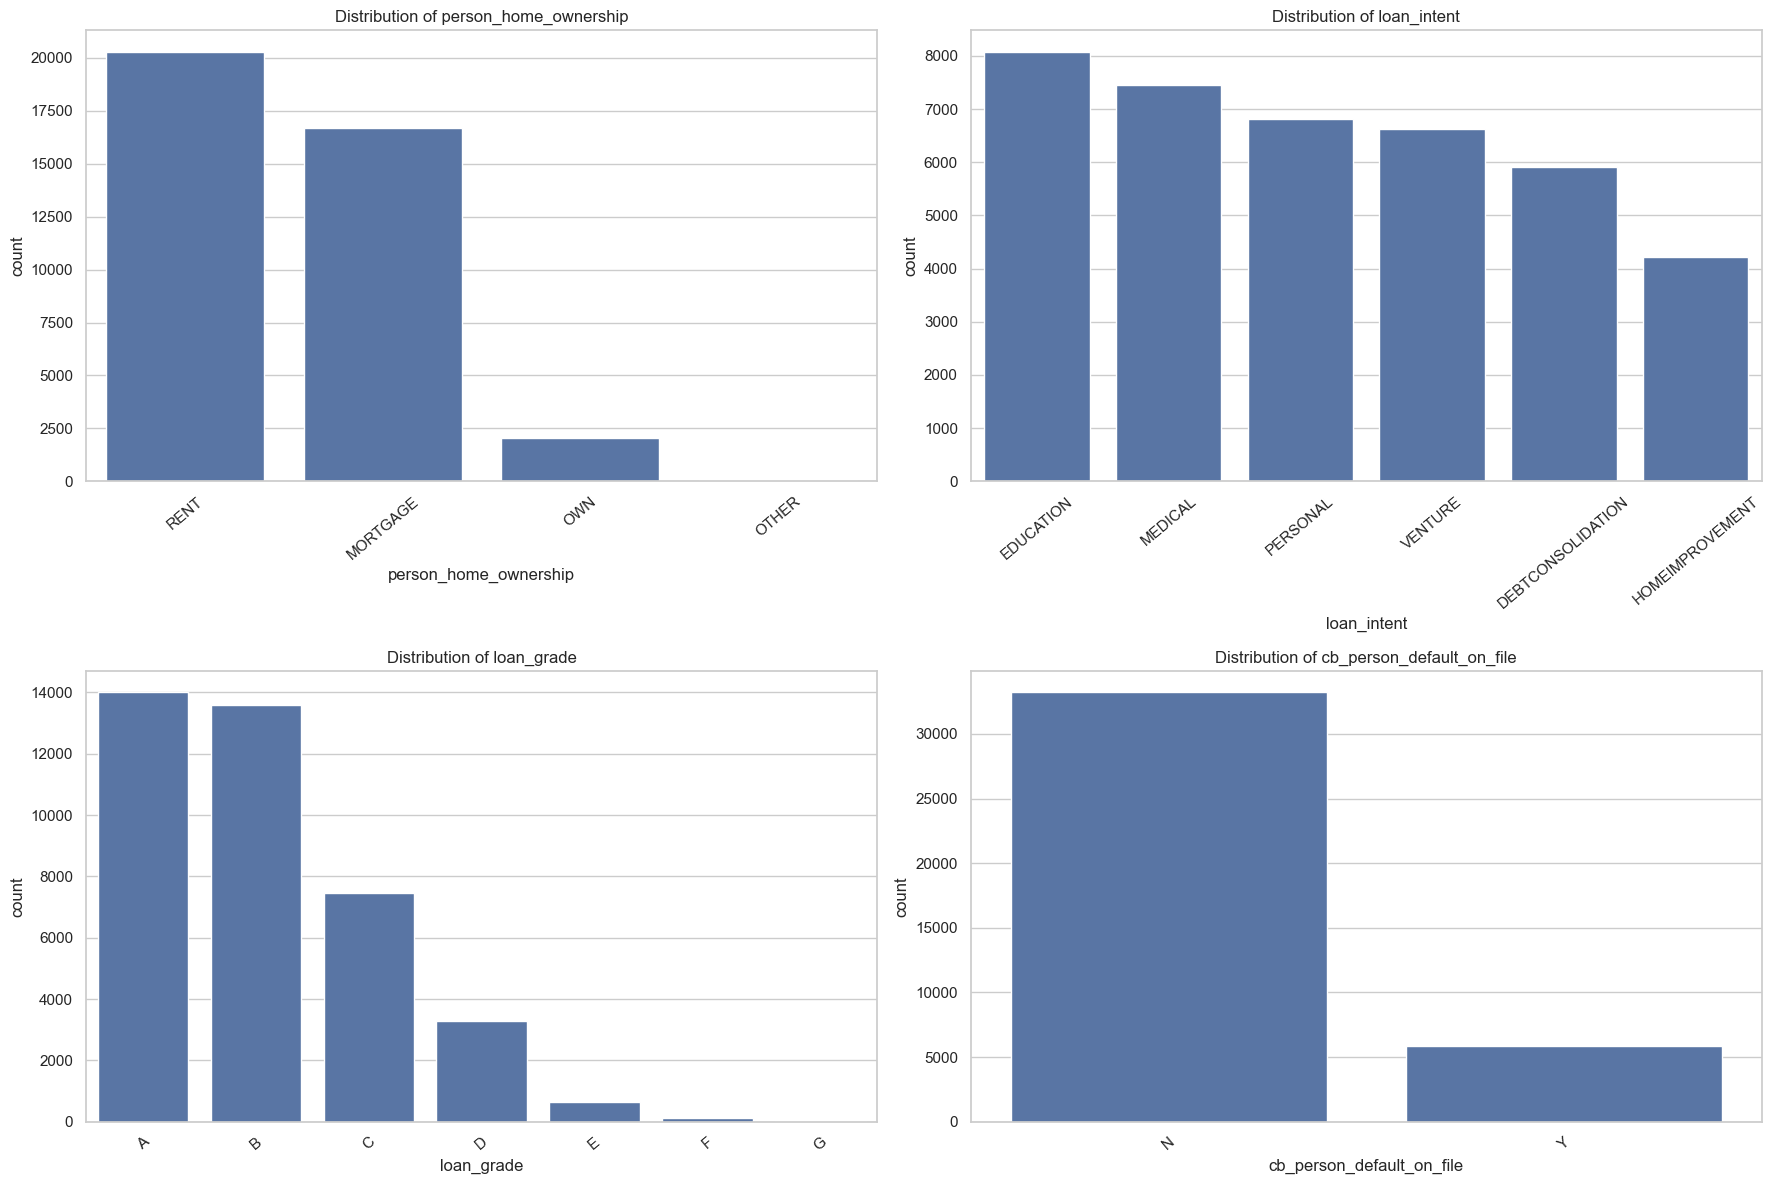

In [48]:
# Define categorical features for visualization
cat_features = ['person_home_ownership', 'loan_intent', 'loan_grade','cb_person_default_on_file']

# Create 2x3 grid for visualization
fig, ax = plt.subplots(2, 2, figsize=(18, 12))

# Iterate over categorical features and plot
for i, feature in enumerate(cat_features):
    row, col = divmod(i, 2)
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, ax=ax[row, col])
    ax[row, col].set_title(f'Distribution of {feature}')
    ax[row, col].tick_params(axis='x', rotation=40)  # Rotate x-axis labels for better readability
    
plt.tight_layout()
plt.show()

<ol>
<li>I think almost all numerical features are skewe aside from 'loan_int_rate'. I think 'person_income' is something that we should possibly look at a bit closer alongside 'loan_amnt' and 'cb_person_cred_hist_length'. I think the skewness of 'person_age' makes the most sense because of how many young individuals are applying for a loan.</li><br>
<li>For 'person_home_ownership', rent dominates followed by mortgage. This tells us that most individuals owe money for their homes as a small amount own their homes.<br>
For 'loan_intent', education and medical have the highest amounts for loan_intent. This tells us that most individuals are probably taking out loans to pay off college tuition or medical bills.<br>
Most 'loan_grade' have either A or B. This means that most individuals have a lowest interest rates and easier approvals.<br>
For 'cb_person_default_on_file', "N" (no) dominates the category. This means that most individuals have no defaulted on a loan before and are generally considered lower-risk.</li>
</ol>

<h3>Bivariate Analysis</h3>

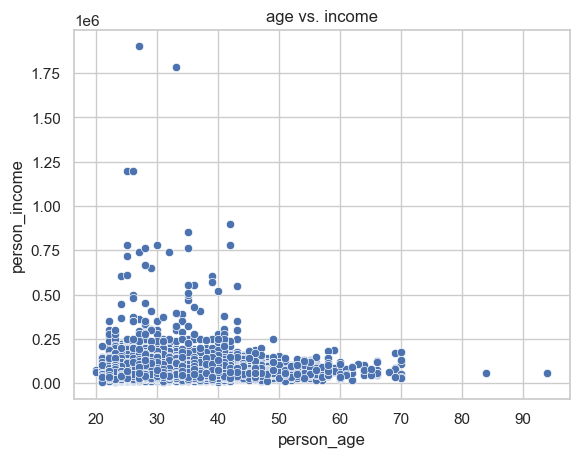

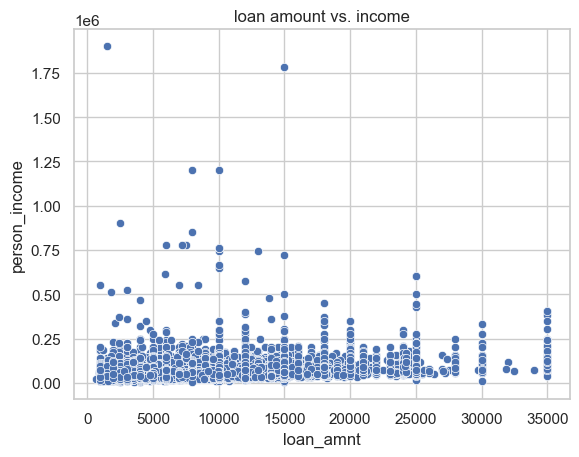

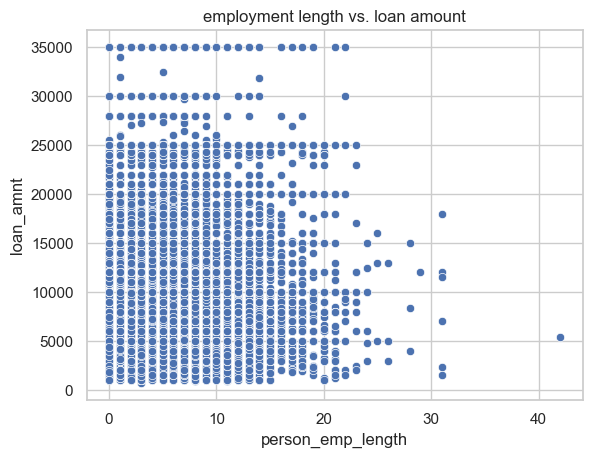

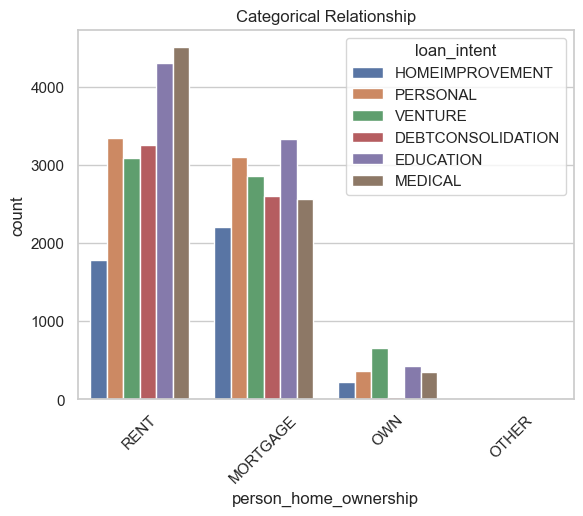

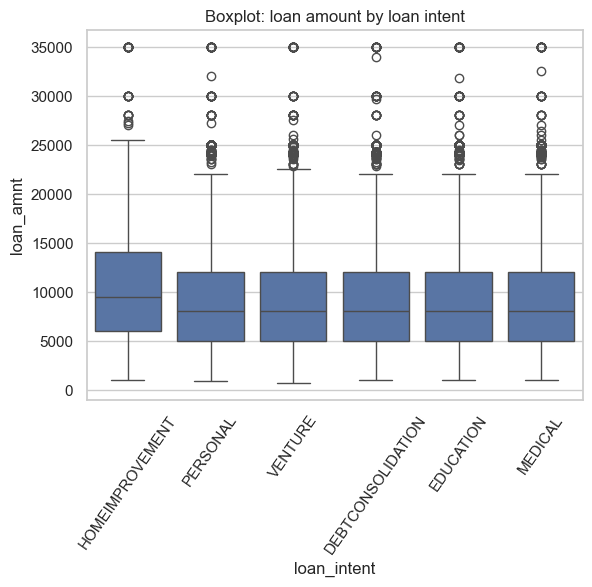

In [66]:
# Scatter plot for numerical vs. numerical
sns.scatterplot(data=df, x='person_age', y='person_income')
plt.title("age vs. income")
plt.show()

sns.scatterplot(data=df, x='loan_amnt', y='person_income')
plt.title("loan amount vs. income")
plt.show()

sns.scatterplot(data=df, x='person_emp_length', y='loan_amnt')
plt.title("employment length vs. loan amount")
plt.show()

# Grouped bar plot for categorical vs. categorical
sns.countplot(data=df, x='person_home_ownership', hue='loan_intent')
plt.title("Categorical Relationship")
plt.xticks(rotation=45)
plt.show()

# Box plot for numerical vs. categorical
sns.boxplot(data=df, x='loan_intent', y='loan_amnt')
plt.title("Boxplot: loan amount by loan intent")
plt.xticks(rotation=55)
plt.show()

<ol>
<li>I feel like it's hard to tell if the numerical features are correlated from the scatterplots alone.</li><br>
<li>Most of the loan intents have smaller loan amounts, indicating that individuals are not taking out large loan amounts.</li><br>
<li>I think because our dataset has a lot of rows, there's no specific pattern to our data in the scatterplots. However, one pattern is that younger individuals have small incomes and tend to take out more loans than older individuals.</li>
</ol>

<h3>Multivariate Analysis</h3>

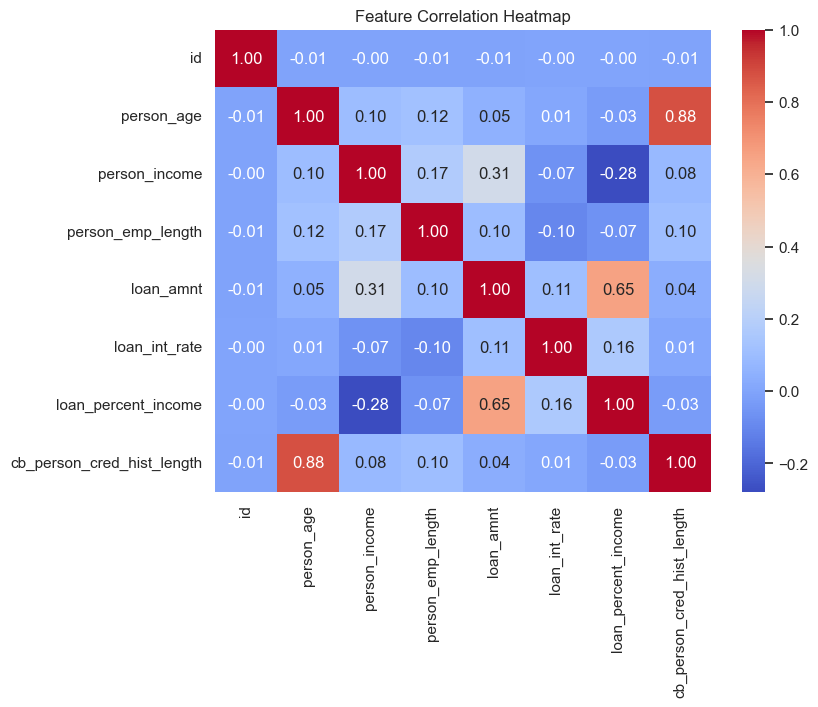

In [63]:
# Create a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

<ol>
<li>'person_age' and 'cb_person_cred_hist_length' have a very strong correlation of 0.88. This means that as an individual gets older, then tend to have a longer credit history. 'loan_amnt' and 'loan_percent_income' also have a strong correlation. 'person_income' and 'loan_amnt' have a weak correlation of 0.31; as income goes up, the loan amount goes up. 'person_income' and 'loan_percent_income' have a weak negative correlation of -0.28. This means that as income goes up, the percent of income represented by the loan amount goes down.</li><br>
<li>I think we could remove either cb_person_cred_hist_length or person_age because it is a bit intuitive that the older someone is, the more likely that they will have a longer credit history. The same can be said for loan_amnt and loan_percent_income because they measure about the same thing, just not as strong, so it might be worth to take a look into the relationship and meaning of the variables.</li><br>
<li>In this dataset, none of the correlations really surprises me to look closer at each relationship. Since we have very little correlations between numerical values, it could mean that most of the factors that relate to loan applications are categorical.</li>
</ol>

<h3>Next Steps</h3>
<ol>
<li>I think most of the variables are important for the problem, and that we need to decide which variable between person_age and cb_person_cred_hist_length is more relevant to our problem.</li><br>
<li>I feel like there's not a lot of data cleaning or transformation steps needed for our dataset. I think we could breakdown income into smaller categories or change it to a categorical variable.</li>
<li>These insights will steer us to create useful models in determining if we can predict loan approval and factors.</li>
</ol>